# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.056703e+01     7.691840e+00
 * time: 0.0018839836120605469
     1     2.263493e+01     3.522628e+00
 * time: 0.008255958557128906
     2     1.599554e+01     2.837548e+00
 * time: 0.01272892951965332
     3     1.193502e+01     1.894702e+00
 * time: 0.016715049743652344
     4     1.182782e+01     3.053669e+00
 * time: 0.020739078521728516
     5     1.090468e+01     2.139023e+00
 * time: 0.0241549015045166
     6     1.012915e+01     1.345476e+00
 * time: 0.027554035186767578
     7     9.422500e+00     1.659148e+00
 * time: 0.031138896942138672
     8     8.970611e+00     1.327087e+00
 * time: 0.03611493110656738
     9     8.643071e+00     7.977839e-01
 * time: 0.041745901107788086
    10     8.402176e+00     6.595818e-01
 * time: 0.04628896713256836
    11     8.260897e+00     6.948286e-01
 * time: 0.09058403968811035
    12     8.139271e+00     5.029232e-01
 * time: 0.09394288063049316
    13     8.051338e+00     5.787988e-01
 

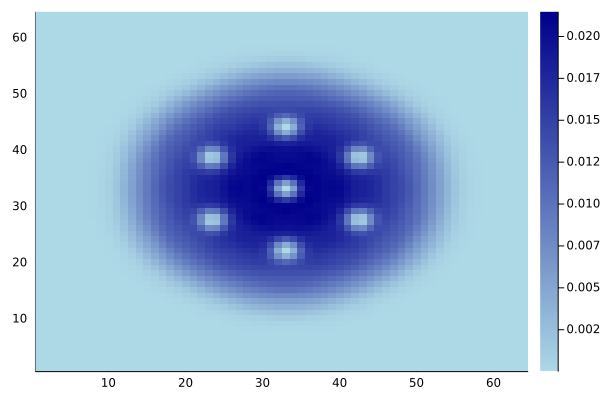

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)